In [10]:
import ROOT
import numpy as np, pandas as pd

import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.set_cmap("tab20")

#presets for plot style
from scipy.constants import golden
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('axes', labelsize=18)
rc('legend', fontsize=18)

import matplotlib.patches as patches

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

<Figure size 504x252 with 0 Axes>

In [3]:
f=ROOT.TFile("out.root")
fcal=f.Get("fcal")
generated=f.Get("generated")

In [16]:
diffs=[]
sums=[]
uxs=[]
for fc, gen in zip(fcal, generated):
    ux = gen.px[0]/gen.pz[0]
    uy = gen.py[0]/gen.pz[0]
    
    if(len(fc.TDC_TDC)!=0):
        nL=0
        nR=0
        dL=0
        dR=0
        for TDC, order, ADC  in zip(fc.TDC_TDC, fc.TDC_order, fc.ADC_ADC):
            if order==2:
                nR+=TDC
                dR+=1
            if order==3:
                nL+=TDC
                dL+=1
        if dR!=0 and dL!=0:
            diffs.append(nR/dR-nL/dL)
            sums.append(nR/dR+nL/dL)
            uxs.append(ux)
ux=pd.Series(uxs)
diff=pd.Series(diffs)
sums=pd.Series(sums)

In [6]:
m= (len(ux)*np.sum(ux*diff)-np.sum(ux)*np.sum(diff))/(len(ux)*np.sum(ux*ux)-np.sum(ux)*np.sum(ux))
b = np.sum(diff-m*ux)/len(ux)
print(m,b)

6989.034445960114 -4.187264045985572


Text(0, 0.5, 'TDCR-TDCL')

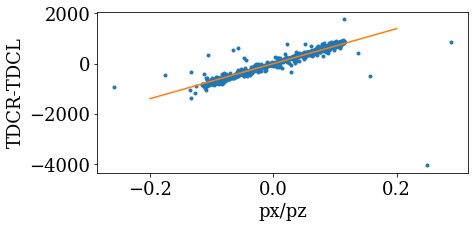

In [20]:
N=1000
plt.plot(uxs[:N], diffs[:N], marker='.', linestyle="")
x = pd.Series([-.2, .2])
plt.plot(x, m*x+b, linestyle="-")
plt.xlabel("px/pz")
plt.ylabel("TDCR-TDCL")

0.03206515765003254


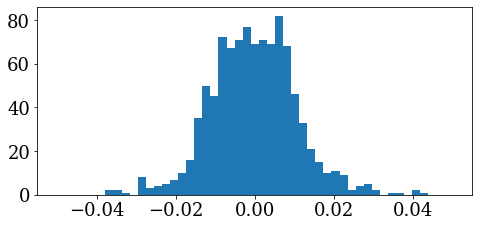

In [9]:
plt.hist(ux-(diff-b)/m,bins=np.linspace(-0.05, .05, 50))
print(np.std(ux-(diff-b)/m))

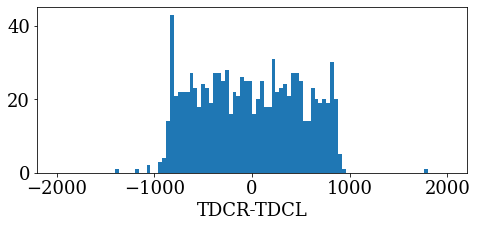

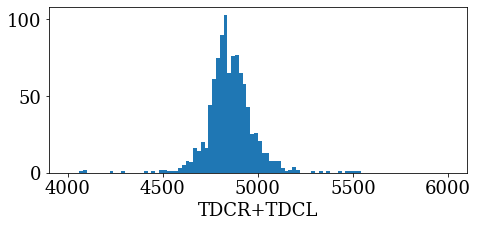

In [19]:
plt.hist(diffs, bins=100, range=(-2000, 2000))
plt.xlabel("TDCR-TDCL")
plt.show()
plt.hist(sums, bins=100, range=(4000, 6000))
plt.xlabel("TDCR+TDCL")
plt.show()